In [1]:
import pandas as pd
import os

# Set the path to your CSV file
file_path = r'C:\Users\Aditi\Downloads\AdvertisingCSV/Advertising.csv'  # Replace with the correct file path

# Check if the file exists and is accessible
if os.path.exists(file_path):
    print("File exists!")
    df = pd.read_csv(file_path)
    print(df.head())  # Print first few rows of the data
else:
    print("File does not exist or cannot be accessed.")

File exists!
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load the dataset
file_path = r'C:\Users\Aditi\Downloads\AdvertisingCSV/Advertising.csv'  # Update with your correct path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to inspect the data
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


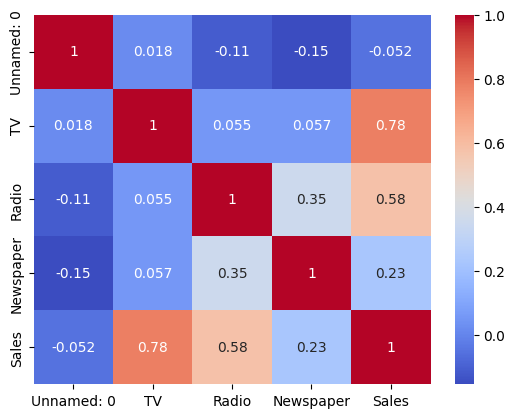

In [4]:
# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()

# Correlation matrix to see relationships between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
# Assuming the columns are 'TV', 'Radio', 'Newspaper' for advertising spend, and 'Sales' as the target variable
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values (sales) on the test data
y_pred = model.predict(X_test)

In [8]:
# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.4607567168117603
Mean Squared Error (MSE): 3.1740973539761033
Root Mean Squared Error (RMSE): 1.78159966153345
R-squared (R2): 0.899438024100912


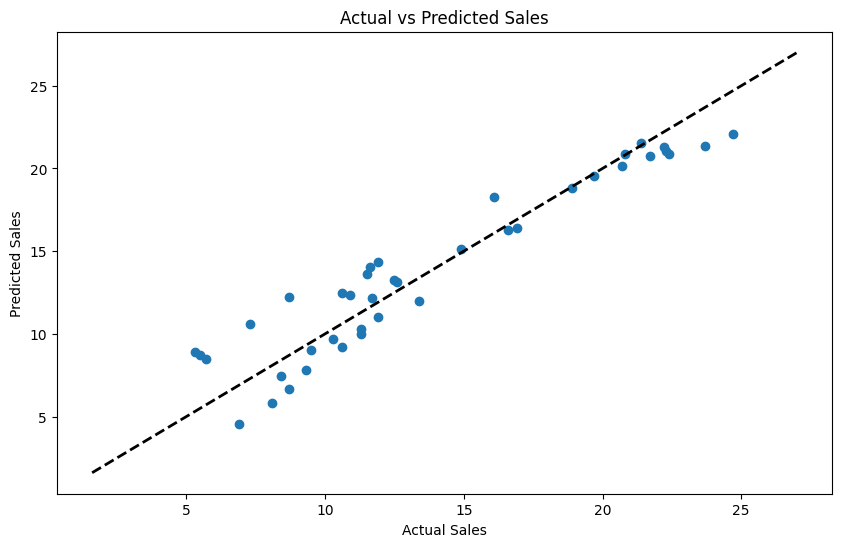

In [9]:
# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()